In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier as kNN
from sklearn.svm import SVC

pd.options.display.max_columns = None
import matplotlib.pyplot as plt
import matplotlib
import helper as hp
matplotlib.rc('figure', figsize=[10,5])
np.random.seed(44)

import warnings
from sklearn.exceptions import DataConversionWarning
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)



# 1. Data Load and Preprocessing

In [2]:
#Getting data for Wine Dataset

wine_dataset = pd.read_csv("data/wine_dataset.csv")
print(wine_dataset.info())
wine_dataset.head()
wine_dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   class                    5000 non-null   int64  
 1   Alcohol                  5000 non-null   float64
 2   Malic_acid               5000 non-null   float64
 3   Ash                      5000 non-null   float64
 4   Alcalinity_of_ash        5000 non-null   float64
 5   Magnesium                5000 non-null   float64
 6   Total_phenols            5000 non-null   float64
 7   Flavanoids               5000 non-null   float64
 8   Nonflavanoid_phenols     5000 non-null   float64
 9   Proanthocyanins          5000 non-null   float64
 10  Color_intensity          5000 non-null   float64
 11  Hue                      5000 non-null   float64
 12  Od_Hod_of_diluted_wines  5000 non-null   float64
 13  Proline                  5000 non-null   float64
dtypes: float64(13), int64(1)

,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,Od_Hod_of_diluted_wines,Proline
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.966600,12.995186,2.330916,2.370151,19.496761,99.072699,2.300694,2.057249,0.362036,1.590397,5.086170,0.962753,2.609474,744.635286
std,0.772272,0.814378,1.118433,0.274757,3.351535,13.951364,0.617459,0.992019,0.124728,0.566114,2.337002,0.225385,0.704532,313.348736
min,1.000000,10.991005,0.478367,1.447951,10.366806,68.871553,0.969383,0.277914,0.109327,0.099295,1.129366,0.414259,1.112145,231.883252
25%,1.000000,12.386366,1.592804,2.236354,17.372474,88.827614,1.791985,1.223907,0.270011,1.238714,3.271563,0.802881,1.996074,507.083531
50%,2.000000,13.026910,1.867287,2.369439,19.383204,97.561288,2.324534,2.138558,0.335068,1.546307,4.745563,0.977078,2.770427,665.609642
75%,3.000000,13.624392,2.940638,2.542378,21.429700,105.978061,2.755317,2.808482,0.442366,1.888451,6.214175,1.104621,3.146931,948.204369
max,3.000000,14.802882,6.242546,3.167812,30.236014,164.765854,3.882879,4.397836,0.756410,3.700137,13.120260,1.603007,4.032795,1782.712893


In [3]:
# normalizing Wine dataset for accuracy

target = wine_dataset["class"]
x = wine_dataset.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_norm = min_max_scaler.fit_transform(x)
wine_dataset = pd.DataFrame(x_norm, columns=wine_dataset.columns)
wine_dataset["class"] = target
wine_dataset.head()
wine_dataset.describe(include='all')

,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,Od_Hod_of_diluted_wines,Proline
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.966600,0.525773,0.321390,0.536206,0.459503,0.314942,0.456946,0.431886,0.390536,0.414098,0.329984,0.461405,0.512670,0.330631
std,0.772272,0.213642,0.194032,0.159755,0.168680,0.145487,0.211931,0.240786,0.192755,0.157217,0.194898,0.189598,0.241224,0.202052
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.366056,0.193338,0.458411,0.352589,0.208105,0.282342,0.229614,0.248320,0.316431,0.178652,0.326917,0.302648,0.177454
50%,2.000000,0.534095,0.240957,0.535792,0.453787,0.299181,0.465129,0.451621,0.348859,0.401854,0.301579,0.473456,0.567778,0.279674
75%,3.000000,0.690837,0.427168,0.636346,0.556786,0.386952,0.612987,0.614227,0.514678,0.496872,0.424056,0.580747,0.696689,0.461895
max,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 2. Training and Test Spliting

In [4]:
wine_train_x, wine_train_y, wine_test_x, wine_test_y = hp.get_data(wine_dataset,"class")


# 3. Applying Algorithms

# Decision Tree 

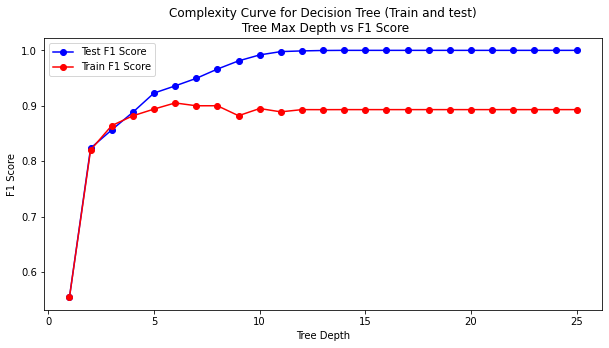

Best Param post Hyperparameter tuning: 
{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 20}


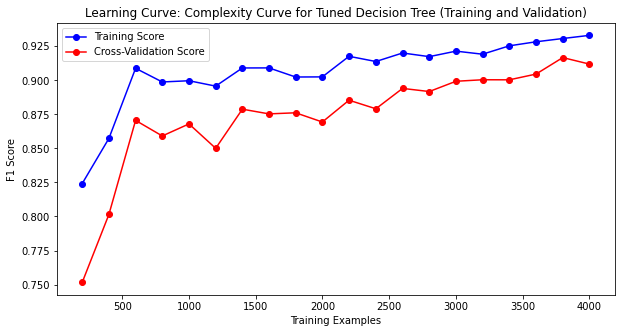

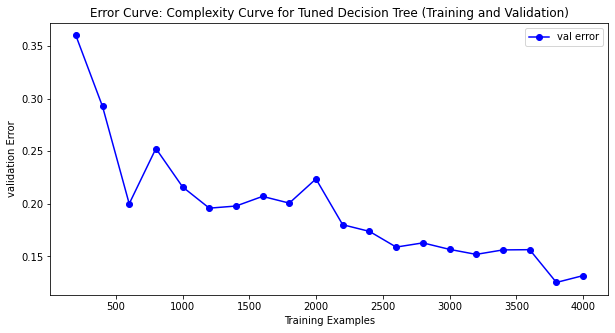

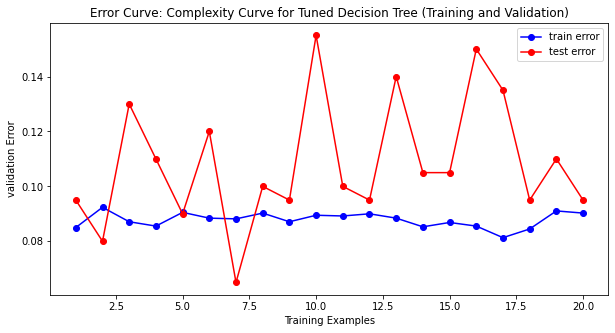

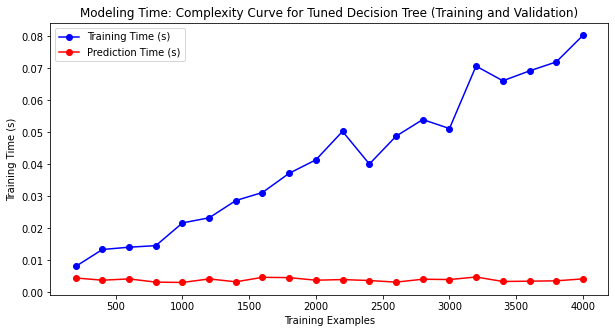

Evaluation on Test Dataset
*****************************************************
Training Time (s):   0.07878
Prediction Time (s): 0.00166

F1 Score:  0.90
Accuracy:  0.90     AUC:       0.00
Precision: 0.90     Recall:    0.90
*****************************************************


In [5]:
from sklearn.metrics import roc_auc_score
train_score = []
test_score = []
max_depth =list(range(1,26))
for i in max_depth:         
        DT_classifier = DecisionTreeClassifier(max_depth=i, random_state=100, min_samples_leaf=1, criterion='entropy')
        DT_classifier.fit(wine_train_x, wine_train_y)
        pred_train = DT_classifier.predict(wine_train_x)
        pred_test = DT_classifier.predict(wine_test_x)
        train_score.append(f1_score(wine_train_y, pred_train, average="weighted"))
        test_score.append(f1_score(wine_test_y, pred_test, average="weighted"))
        #y_pred = DT_classifier.predict_proba(wine_test_x)

hp.plot_graph("Complexity Curve for Decision Tree (Train and test)\n Tree Max Depth vs F1 Score",'Tree Depth', 'F1 Score', [train_score,test_score],['Test F1 Score','Train F1 Score'],max_depth)
#y_score = np.transpose([y_pred[:, 1] for y_pred in ])


param_grid = {
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf':np.linspace( round(0.005*len(wine_train_x)),round(0.05*len(wine_train_x)),20).round().astype('int'),
    'max_depth':np.arange(1,20)
}

DT_classifier = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid=param_grid, cv=10)
DT_classifier.fit(wine_train_x, wine_train_y)
print("Best Param post Hyperparameter tuning: ")
print(DT_classifier.best_params_)
max_depth, min_samples_leaf, criterion = DT_classifier.best_params_['max_depth'], DT_classifier.best_params_['min_samples_leaf'], DT_classifier.best_params_['criterion']


DT_classifier_Tuned = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=100, criterion=criterion)

train_samp, DT_train_score, DT_fit_time, DT_pred_time = hp.validate_and_plot(DT_classifier_Tuned, wine_train_x,wine_train_y,"f1_weighted",title="Complexity Curve for Tuned Decision Tree (Training and Validation)")

hp.final_classifier_evaluation(DT_classifier_Tuned, wine_train_x, wine_test_x, wine_train_y, wine_test_y,True)

# Neural Network

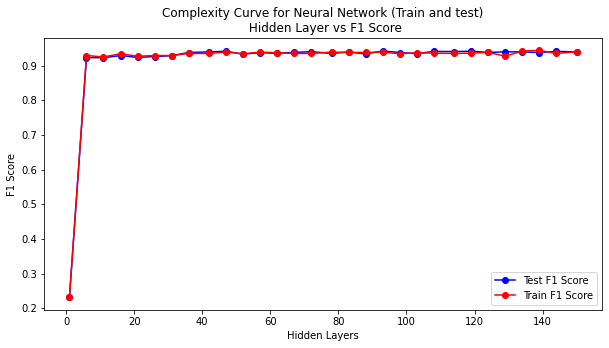

Per Hyperparameter tuning, best parameters are:
{'alpha': 0.0001, 'hidden_layer_sizes': 100, 'learning_rate_init': 0.05}


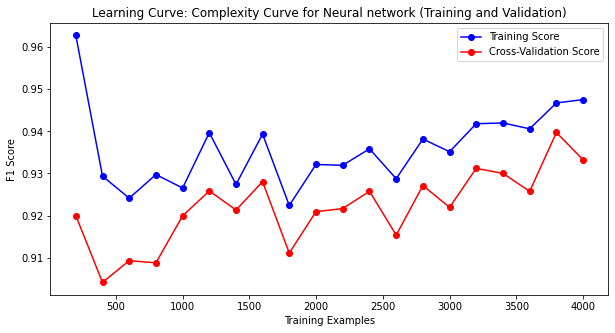

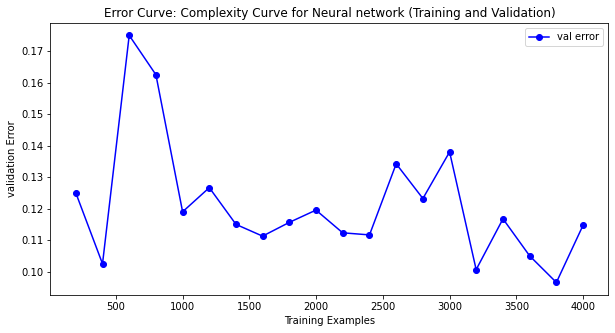

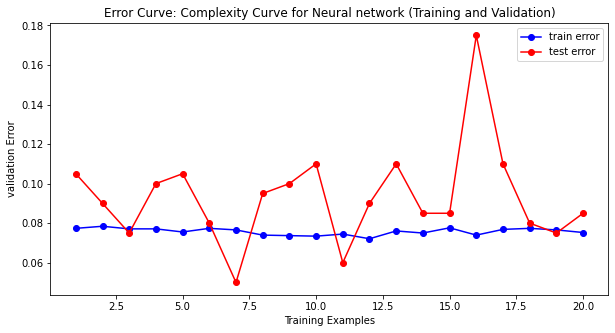

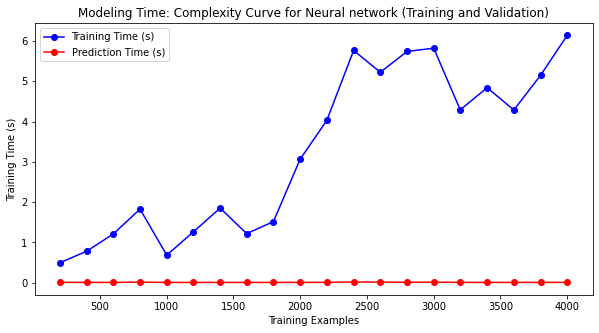

Evaluation on Test Dataset
*****************************************************
Training Time (s):   3.87590
Prediction Time (s): 0.00272

F1 Score:  0.93
Accuracy:  0.93     AUC:       0.00
Precision: 0.93     Recall:    0.93
*****************************************************


In [11]:

train_score = []
test_score = []
hlist = np.linspace(1,150,30).astype('int')
for i in hlist:         
        NN_classifier = MLPClassifier(hidden_layer_sizes=(i,), solver='sgd', activation='relu', 
                            learning_rate_init=0.05, random_state=100)
        NN_classifier.fit(wine_train_x, wine_train_y)
        pred_train = NN_classifier.predict(wine_train_x)
        pred_test = NN_classifier.predict(wine_test_x)
        train_score.append(f1_score(wine_train_y, pred_train, average="weighted"))
        test_score.append(f1_score(wine_test_y, pred_test, average="weighted"))

hp.plot_graph("Complexity Curve for Neural Network (Train and test)\n Hidden Layer vs F1 Score",'Hidden Layers', 'F1 Score', [train_score,test_score],['Test F1 Score','Train F1 Score'],hlist)

param_grid = {
        'hidden_layer_sizes': [5, 15, 30, 75, 100], 
        'learning_rate_init':  [0.005, 0.01, 0.05],
        'alpha' : [0.001, 0.0001]
        }

NN_classifier = GridSearchCV(estimator = MLPClassifier(random_state=100,solver='sgd', activation='relu'),
                param_grid=param_grid, cv=10)
NN_classifier.fit(wine_train_x, wine_train_y)
print("Per Hyperparameter tuning, best parameters are:")
print(NN_classifier.best_params_)

h_units, learn_rate, alpha = NN_classifier.best_params_['hidden_layer_sizes'], NN_classifier.best_params_['learning_rate_init'],  NN_classifier.best_params_['alpha']

NN_classifier_Tuned = MLPClassifier(hidden_layer_sizes=(h_units,), solver='sgd', activation='relu', 
                               learning_rate_init=learn_rate, random_state=100, alpha=alpha)
train_samp, NN_train_score, NN_fit_time, NN_pred_time = hp.validate_and_plot(NN_classifier_Tuned, wine_train_x, wine_train_y,"f1_weighted",title="Complexity Curve for Neural network (Training and Validation)")
hp.final_classifier_evaluation(NN_classifier_Tuned, wine_train_x, wine_test_x, wine_train_y, wine_test_y,True)


# Boosted Decision Tree Classifier

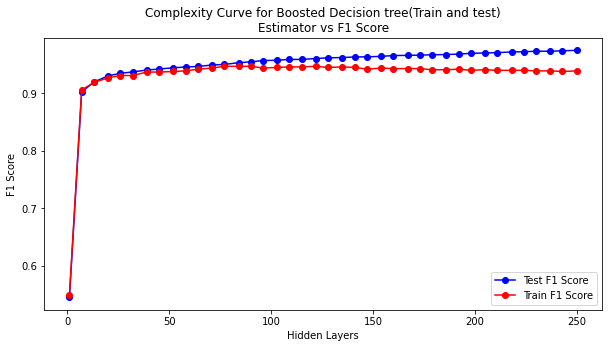

Per Hyperparameter tuning, best parameters are:
{'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 200, 'n_estimators': 100}


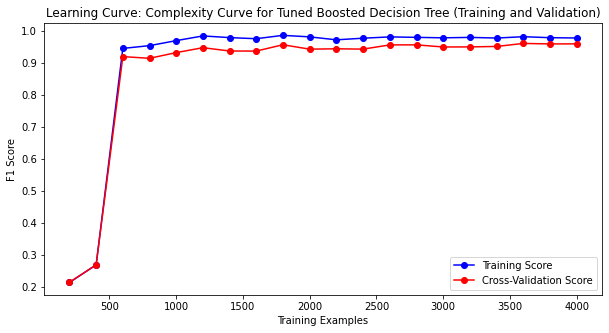

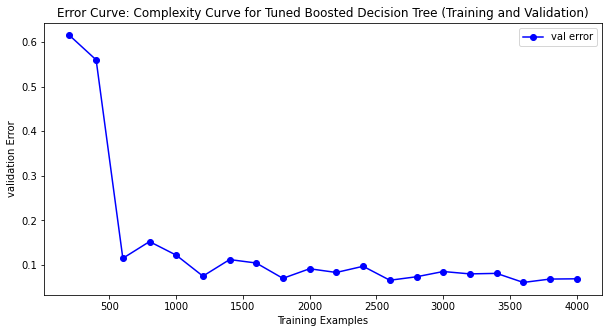

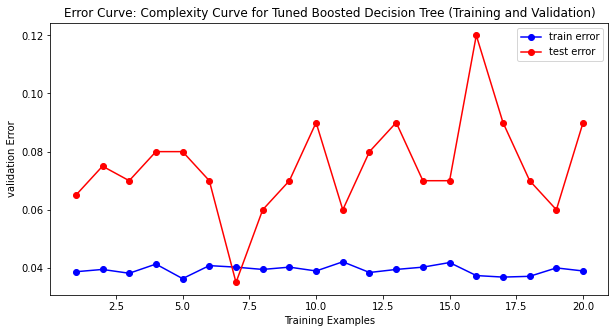

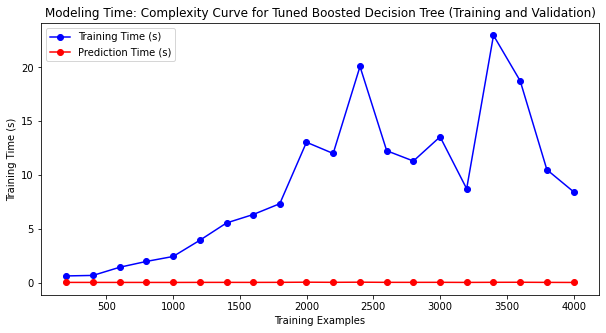

Evaluation on Test Dataset
*****************************************************
Training Time (s):   6.12910
Prediction Time (s): 0.01088

F1 Score:  0.94
Accuracy:  0.94     AUC:       0.00
Precision: 0.94     Recall:    0.94
*****************************************************


In [12]:
train_score = []
test_score = []
max_depth = 5
min_samples_leaf = 50
n_estimators = np.linspace(1,250,40).astype('int')
for i in n_estimators:         
        BDT_classifier = GradientBoostingClassifier(n_estimators=i, max_depth=int(max_depth/2), min_samples_leaf=int(min_samples_leaf/2), random_state=100,)
        BDT_classifier.fit(wine_train_x, wine_train_y)
        pred_train = BDT_classifier.predict(wine_train_x)
        pred_test = BDT_classifier.predict(wine_test_x)
        train_score.append(f1_score(wine_train_y, pred_train, average="weighted"))
        test_score.append(f1_score(wine_test_y, pred_test, average="weighted"))
      

hp.plot_graph("Complexity Curve for Boosted Decision tree(Train and test)\nEstimator vs F1 Score",'Hidden Layers', 'F1 Score', [train_score,test_score],['Test F1 Score','Train F1 Score'],n_estimators)

param_grid = {'min_samples_leaf': np.linspace(round(0.005*len(wine_train_x)),round(0.05*len(wine_train_x)),3).round().astype('int'),
                  'max_depth': np.arange(1,4),
                  'n_estimators': np.linspace(10,100,3).round().astype('int'),
                  'learning_rate': np.linspace(.001,.1,3)}

BDT_classifier = GridSearchCV(estimator = GradientBoostingClassifier(), param_grid=param_grid, cv=10)
BDT_classifier.fit(wine_train_x, wine_train_y)
print("Per Hyperparameter tuning, best parameters are:")
print(BDT_classifier.best_params_)

max_depth, min_samples_leaf, n_est, learn_rate = BDT_classifier.best_params_['max_depth'], BDT_classifier.best_params_['min_samples_leaf'], BDT_classifier.best_params_['n_estimators'], BDT_classifier.best_params_['learning_rate']

BDT_classifier_Tuned = GradientBoostingClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, n_estimators=n_est, learning_rate=learn_rate, random_state=100)

train_samp, BDT_train_score, BDT_fit_time, BDT_pred_time = hp.validate_and_plot(BDT_classifier_Tuned, wine_train_x, wine_train_y,"f1_weighted",title="Complexity Curve for Tuned Boosted Decision Tree (Training and Validation)")

hp.final_classifier_evaluation(BDT_classifier_Tuned, wine_train_x, wine_test_x, wine_train_y, wine_test_y,True)



# SVM

Per Hyperparameter tuning, best parameters for kernal linear are:
{'C': 10.0, 'gamma': 1}


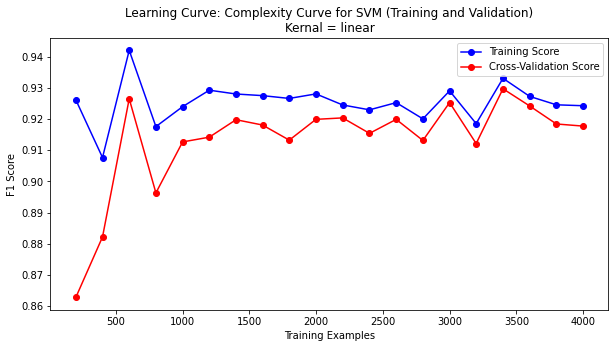

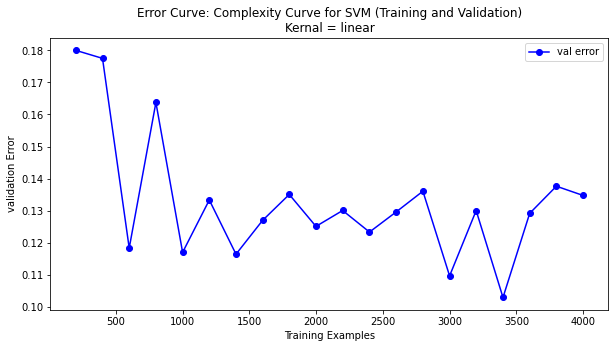

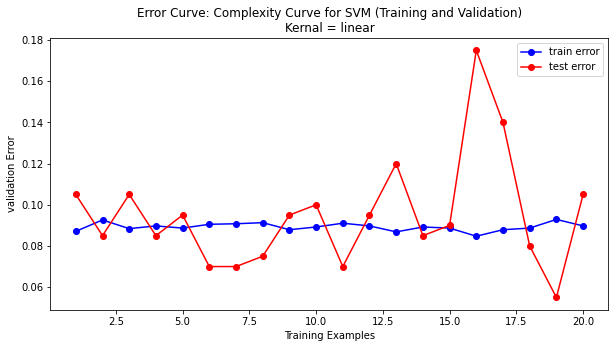

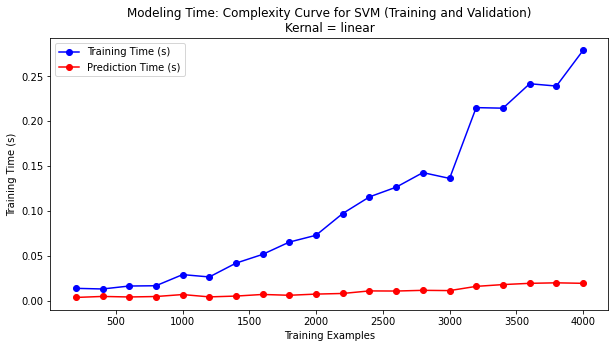

Evaluation on Test Dataset
*****************************************************
Training Time (s):   0.19066
Prediction Time (s): 0.04379

F1 Score:  0.93
Accuracy:  0.93     AUC:       0.00
Precision: 0.93     Recall:    0.93
*****************************************************
Per Hyperparameter tuning, best parameters for kernal rbf are:
{'C': 1, 'gamma': 1}


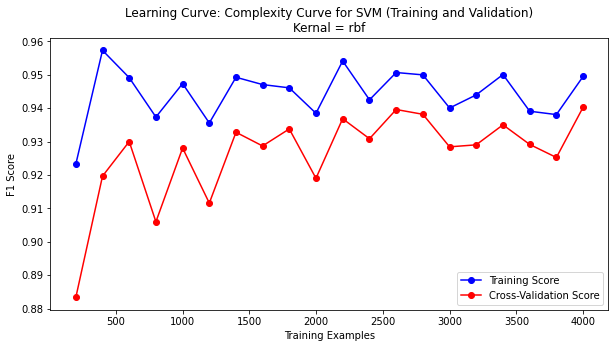

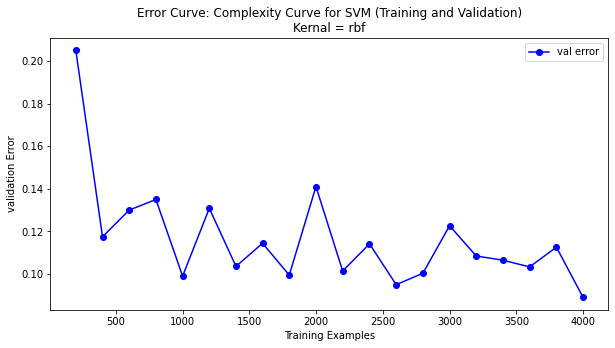

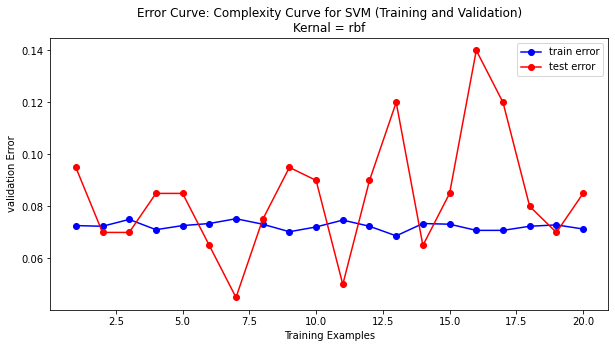

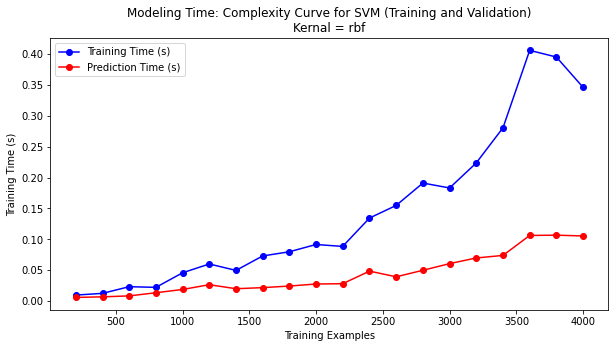

Evaluation on Test Dataset
*****************************************************
Training Time (s):   0.90974
Prediction Time (s): 0.50028

F1 Score:  0.94
Accuracy:  0.94     AUC:       0.00
Precision: 0.94     Recall:    0.94
*****************************************************


In [14]:
kernel_func = ['linear','rbf']
for i in kernel_func:            
    param_grid = {'C':  [1e-4, 1e-3, 1e-2, 1e01, 1],
                'gamma': [1,10,100]
                }

    SVM_classifier = GridSearchCV(estimator = SVC(kernel=i,random_state=100),
                        param_grid=param_grid, cv=10)
    SVM_classifier.fit(wine_train_x, wine_train_y)
    print("Per Hyperparameter tuning, best parameters for kernal "+i+" are:")
    print(SVM_classifier.best_params_)

    SVM_classifier_Tuned = SVC(C=SVM_classifier.best_params_['C'], gamma=SVM_classifier.best_params_['gamma'], kernel=i, random_state=100)

    train_samp, SVM_train_score, SVM_fit_time, SVM_pred_time = hp.validate_and_plot(SVM_classifier_Tuned, wine_train_x, wine_train_y,"f1_weighted",title="Complexity Curve for SVM (Training and Validation)\nKernal = "+i)

    hp.final_classifier_evaluation(SVM_classifier_Tuned, wine_train_x, wine_test_x, wine_train_y, wine_test_y,True)


# KNN

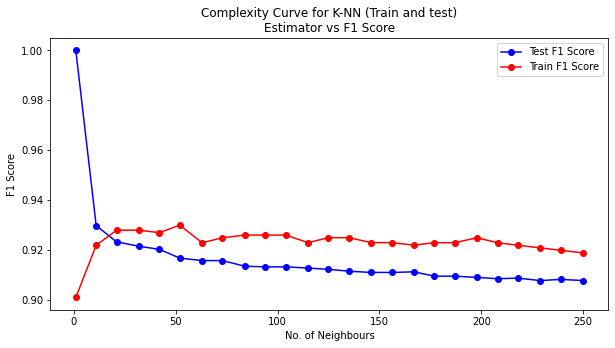

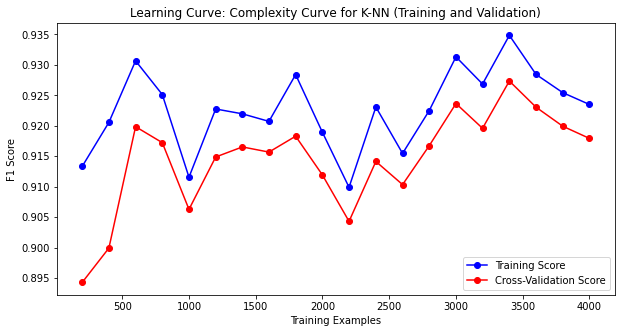

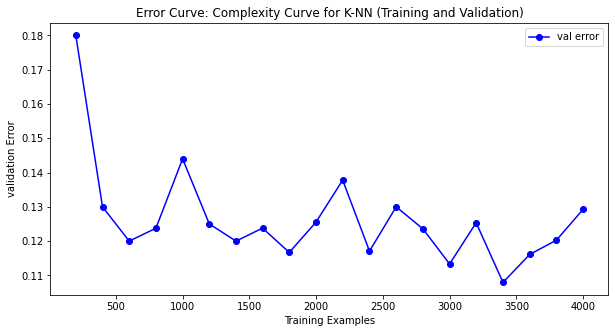

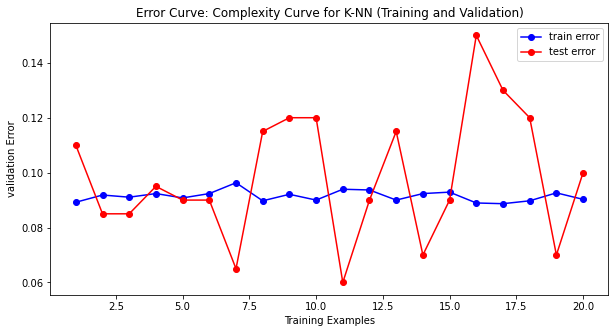

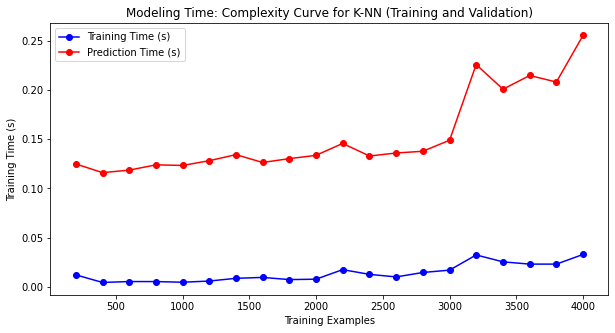

Evaluation on Test Dataset
*****************************************************
Training Time (s):   0.01650
Prediction Time (s): 0.15216

F1 Score:  0.93
Accuracy:  0.93     AUC:       0.00
Precision: 0.93     Recall:    0.93
*****************************************************


In [13]:
train_score = []
test_score = []
klist = np.linspace(1,250,25).astype('int')
for i in klist:         
        KNN_classifier =  kNN(n_neighbors=i,n_jobs=-1)
        KNN_classifier.fit(wine_train_x, wine_train_y)
        pred_train = KNN_classifier.predict(wine_train_x)
        pred_test = KNN_classifier.predict(wine_test_x)
        train_score.append(f1_score(wine_train_y, pred_train, average="weighted"))
        test_score.append(f1_score(wine_test_y, pred_test, average="weighted"))

hp.plot_graph("Complexity Curve for K-NN (Train and test)\nEstimator vs F1 Score",'No. of Neighbours', 'F1 Score', [train_score,test_score],['Test F1 Score','Train F1 Score'],klist)

      
KNN_classifier_Tuned = kNN(n_neighbors=20, n_jobs=-1)

train_samp, kNN_train_score, kNN_fit_time, kNN_pred_time = hp.validate_and_plot(KNN_classifier_Tuned, wine_train_x, wine_train_y,"f1_weighted",title="Complexity Curve for K-NN (Training and Validation)")

hp.final_classifier_evaluation(KNN_classifier_Tuned, wine_train_x, wine_test_x, wine_train_y, wine_test_y,True)


# 4. Final model time comparison 

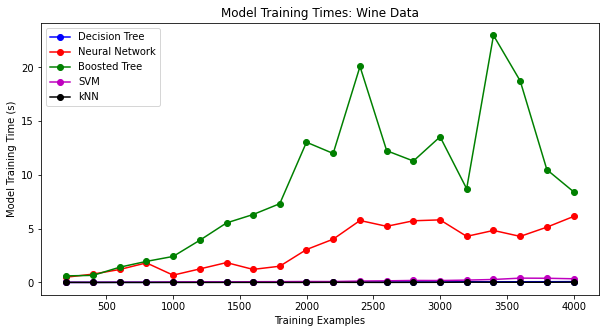

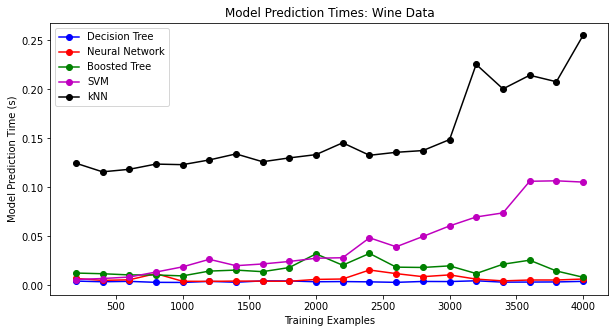

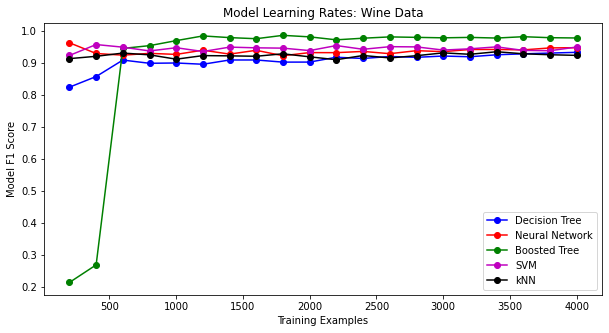

In [15]:
  
hp.plot_graph("Model Training Times: Wine Data",
                "Training Examples", 
                "Model Training Time (s)",
               [DT_fit_time,NN_fit_time,BDT_fit_time,SVM_fit_time,kNN_fit_time],
               ["Decision Tree","Neural Network","Boosted Tree","SVM","kNN"],
               train_samp)

hp.plot_graph("Model Prediction Times: Wine Data",
                "Training Examples", 
                "Model Prediction Time (s)",
               [DT_pred_time,NN_pred_time,BDT_pred_time,SVM_pred_time,kNN_pred_time],
               ["Decision Tree","Neural Network","Boosted Tree","SVM","kNN"],
               train_samp)

hp.plot_graph("Model Learning Rates: Wine Data",
                "Training Examples", 
                "Model F1 Score",
               [DT_train_score,NN_train_score,BDT_train_score,SVM_train_score,kNN_train_score],
               ["Decision Tree","Neural Network","Boosted Tree","SVM","kNN"],
               train_samp)